In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df=pd.read_csv("//content//BigBasket Products.csv")
df

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
...,...,...,...,...,...,...,...,...,...,...
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori..."


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27549 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18919 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


In [84]:
df.describe()

,index,sale_price,market_price,rating
count,27555.00000,27549.000000,27555.000000,18919.000000
mean,13778.00000,334.648391,382.056664,3.943295
std,7954.58767,1202.102113,581.730717,0.739217
min,1.00000,2.450000,3.000000,1.000000
25%,6889.50000,95.000000,100.000000,3.700000
50%,13778.00000,190.320000,220.000000,4.100000
75%,20666.50000,359.000000,425.000000,4.300000
max,27555.00000,112475.000000,12500.000000,5.000000


In [85]:
df.isnull().sum()

,0
index,0
product,1
category,0
sub_category,0
brand,1
sale_price,6
market_price,0
type,0
rating,8636
description,115


In [86]:
df['product']=df['product'].fillna("unknown")

In [87]:
df.isnull().sum()

,0
index,0
product,0
category,0
sub_category,0
brand,1
sale_price,6
market_price,0
type,0
rating,8636
description,115


In [88]:
df['rating'].median()

4.1

In [89]:
df['rating']=df['rating'].fillna(4.1)

In [90]:
df.isnull().sum()

,0
index,0
product,0
category,0
sub_category,0
brand,1
sale_price,6
market_price,0
type,0
rating,0
description,115


In [91]:
df['sale_price'].median()

190.32

In [92]:
df['sale_price']=df['sale_price'].fillna(190.32)

In [93]:
df.isnull().sum()

,0
index,0
product,0
category,0
sub_category,0
brand,1
sale_price,0
market_price,0
type,0
rating,0
description,115


In [94]:
q1=df['sale_price'].quantile(0.25)
q3=df['sale_price'].quantile(0.75)
IQR=q3-q1

In [95]:
lower_limit=max(q1-1.5*IQR,0)
lower_limit


0

In [96]:
upper_limit=q3+1.5*IQR
upper_limit

np.float64(755.0)

In [132]:
df_clean=df[(df['sale_price']>=lower_limit) & (df['sale_price']<=upper_limit)]

<Axes: ylabel='sale_price'>

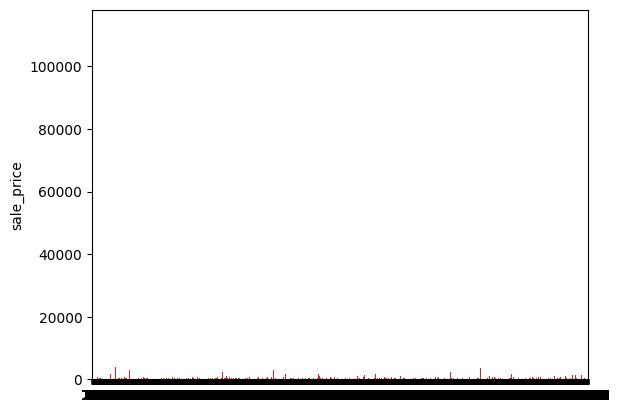

In [133]:
sns.barplot(df['sale_price'],color='red')

In [98]:
df1=df.select_dtypes(include='number')
df1

,index,sale_price,market_price,rating
0,1,220.00,220.0,4.1
1,2,180.00,180.0,2.3
2,3,119.00,250.0,3.4
3,4,149.00,176.0,3.7
4,5,162.00,162.0,4.4
...,...,...,...,...
27550,27551,199.20,249.0,3.9
27551,27552,67.50,75.0,4.0
27552,27553,200.00,200.0,3.8
27553,27554,396.00,495.0,4.2


In [135]:
df1.corr()

,index,sale_price,market_price,rating
index,1.000000,-0.014648,0.005493,0.001784
sale_price,-0.014648,1.000000,0.411104,-0.009961
market_price,0.005493,0.411104,1.000000,-0.043841
rating,0.001784,-0.009961,-0.043841,1.000000


<Axes: >

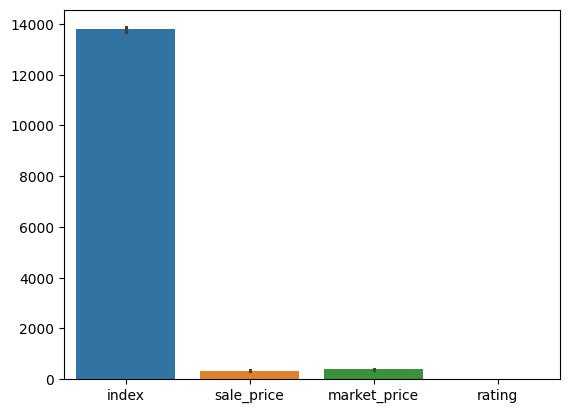

In [134]:
sns.barplot(df1)

In [139]:
df['sale_price']=np.where((df['sale_price']<=lower_limit)|(df['sale_price']>=upper_limit),df['sale_price'],df['sale_price'])
df

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
...,...,...,...,...,...,...,...,...,...,...
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori..."


In [101]:
df.shape

(27555, 10)

In [102]:
print(f"DataSet rows: {df.shape[0]}\nDataset columns: {df.shape[1]}")

DataSet rows: 27555
Dataset columns: 10


In [103]:
df[df.duplicated()]

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description


In [104]:
df['product'].nunique()

23541

In [105]:
df['category']

,category
0,Beauty & Hygiene
1,"Kitchen, Garden & Pets"
2,Cleaning & Household
3,Cleaning & Household
4,Beauty & Hygiene
...,...
27550,Beauty & Hygiene
27551,Gourmet & World Food
27552,Gourmet & World Food
27553,Beverages


** top categories**

In [123]:
a=(df['category'].value_counts().head(10))
a

,count
category,
Beauty & Hygiene,7867
Gourmet & World Food,4690
"Kitchen, Garden & Pets",3580
Snacks & Branded Foods,2814
"Foodgrains, Oil & Masala",2676
Cleaning & Household,2675
Beverages,885
"Bakery, Cakes & Dairy",851
Baby Care,610


In [124]:
b=(df['product'].value_counts().head(10))
b

,count
product,
Turmeric Powder/Arisina Pudi,26
Extra Virgin Olive Oil,15
Cow Ghee/Tuppa,14
Colorsilk Hair Colour With Keratin,12
Soft Drink,12
Olive Oil - Extra Virgin,12
Powder - Coriander,11
Coriander Powder,11
Ghee/Tuppa,11


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Beauty & Hygiene'),
  Text(1, 0, 'Gourmet & World Food'),
  Text(2, 0, 'Kitchen, Garden & Pets'),
  Text(3, 0, 'Snacks & Branded Foods'),
  Text(4, 0, 'Foodgrains, Oil & Masala'),
  Text(5, 0, 'Cleaning & Household'),
  Text(6, 0, 'Beverages'),
  Text(7, 0, 'Bakery, Cakes & Dairy'),
  Text(8, 0, 'Baby Care'),
  Text(9, 0, 'Fruits & Vegetables')])

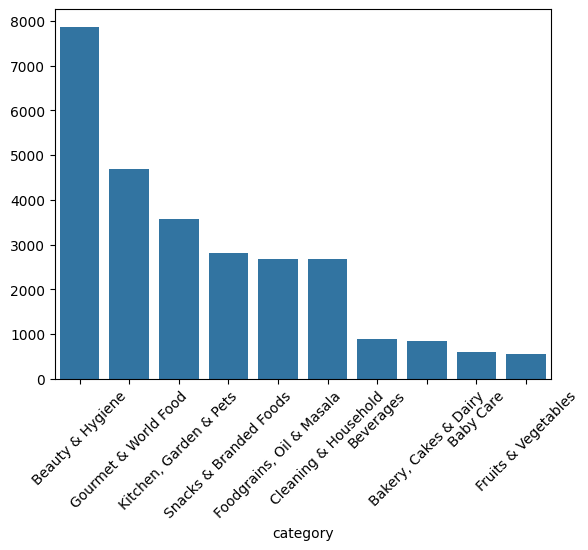

In [128]:
sns.barplot(x=a.index,y=a.values)
plt.xticks(rotation=45)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Turmeric Powder/Arisina Pudi'),
  Text(1, 0, 'Extra Virgin Olive Oil'),
  Text(2, 0, 'Cow Ghee/Tuppa'),
  Text(3, 0, 'Colorsilk Hair Colour With Keratin'),
  Text(4, 0, 'Soft Drink'),
  Text(5, 0, 'Olive Oil - Extra Virgin'),
  Text(6, 0, 'Powder - Coriander'),
  Text(7, 0, 'Coriander Powder'),
  Text(8, 0, 'Ghee/Tuppa'),
  Text(9, 0, 'Peanut Butter - Creamy')])

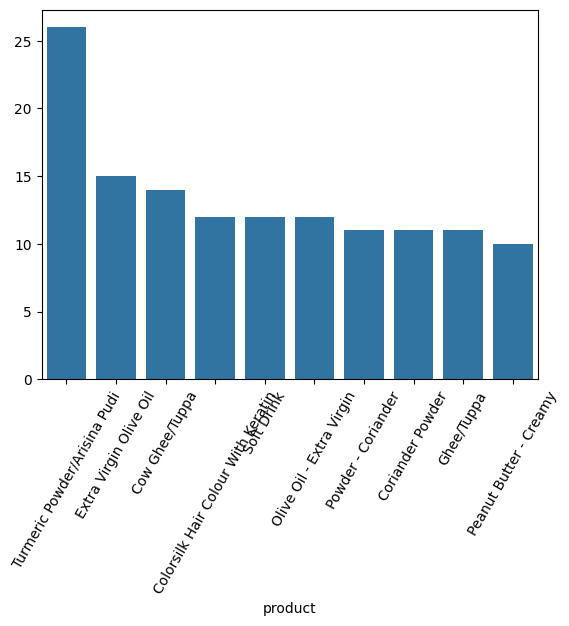

In [130]:
sns.barplot(x=b.index,y=b.values)
plt.xticks(rotation=60)


In [109]:
df['category'].value_counts()

,count
category,
Beauty & Hygiene,7867
Gourmet & World Food,4690
"Kitchen, Garden & Pets",3580
Snacks & Branded Foods,2814
"Foodgrains, Oil & Masala",2676
Cleaning & Household,2675
Beverages,885
"Bakery, Cakes & Dairy",851
Baby Care,610


<BarContainer object of 1 artists>

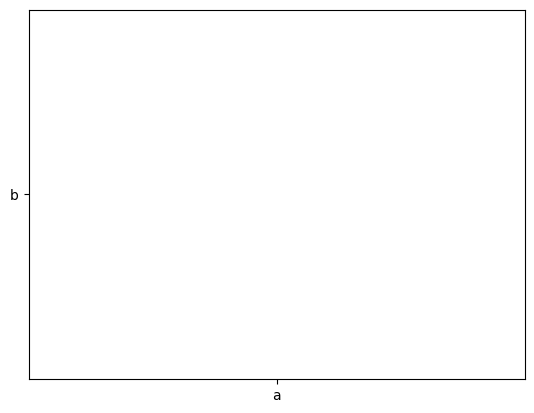

In [113]:
plt.bar('a','b')